The purpose of this notebook is to analyze PCA/ICA of the verbose (large) data collection for the singleton weaselball case. This will tell us what data to put into the Markov Chain.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
sns.set()

## Get rows to skip (Downsample)

In [93]:
import csv
row_count = len(open('../../data/10-07-2018_09-47-33_long.csv').readlines())
row_count

11299060

In [94]:
skip_rows = []
SAMPLE = 250
for i in range(row_count+100):
    if (i % SAMPLE != 0):
        skip_rows.append(i)
#There appears to be something wrong with the data collection where extra rows are given for no reason... 
#So I am clipping out some of the data
for i in range(int((2.0/3.0)*row_count)):
    skip_rows.append(i)

## Import data

In [95]:
df = pd.read_csv('../../data/10-07-2018_09-47-33_long.csv', index_col=False, skiprows = skip_rows, sep=',', header=None)
df.shape

(15066, 40)

In [96]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,14985 517000000,48,0,-0.027979,0.344137,2.03535,-0.019105,0.347468,0.041,-0.055463,...,2.584690,-3.712140,-1.434930,-3.45610,-11.4949,-3.15820,1,1,0,NaN
1,14985 767000000,48,0,-0.029478,0.396406,2.04870,-0.038135,0.404294,0.041,1.401630,...,2.224930,-7.098020,3.002540,8.70964,-57.8569,-1.73376,1,1,0,NaN
2,14986 17000000,48,0,-0.037741,0.496602,2.04732,-0.038430,0.507709,0.041,-0.777750,...,-0.046311,-0.838124,2.795540,25.12890,139.3170,-46.01750,1,1,0,NaN
3,14986 267000000,48,0,-0.039684,0.497387,2.00736,-0.044504,0.507859,0.041,-0.868378,...,-0.056913,0.064586,-0.203651,-1.75967,-31.3824,9.22416,1,1,0,NaN
4,14986 517000000,48,0,-0.038976,0.476104,2.00549,-0.037135,0.466660,0.041,0.150809,...,0.870542,7.985590,1.056690,16.18820,-32.4782,-5.09194,1,1,0,NaN


In [97]:
#Remove useless columns
df = df.drop(columns=[0,1,36,37,38,39], axis=1)
df.head()

,2,3,4,5,6,7,8,9,10,11,...,26,27,28,29,30,31,32,33,34,35
0,0,-0.027979,0.344137,2.03535,-0.019105,0.347468,0.041,-0.055463,-0.055463,1.87143,...,-0.008304,0.395906,-0.165988,0.048860,2.584690,-3.712140,-1.434930,-3.45610,-11.4949,-3.15820
1,0,-0.029478,0.396406,2.04870,-0.038135,0.404294,0.041,1.401630,1.401630,2.28316,...,-0.296324,0.250291,0.134410,-1.965250,2.224930,-7.098020,3.002540,8.70964,-57.8569,-1.73376
2,0,-0.037741,0.496602,2.04732,-0.038430,0.507709,0.041,-0.777750,-0.777750,-1.11605,...,0.017196,2.726250,-1.667530,-3.487960,-0.046311,-0.838124,2.795540,25.12890,139.3170,-46.01750
3,0,-0.039684,0.497387,2.00736,-0.044504,0.507859,0.041,-0.868378,-0.868378,-1.39298,...,-0.001755,-0.733295,0.312100,0.936270,-0.056913,0.064586,-0.203651,-1.75967,-31.3824,9.22416
4,0,-0.038976,0.476104,2.00549,-0.037135,0.466660,0.041,0.150809,0.150809,-1.44429,...,0.042047,-1.260490,-0.564123,-0.312194,0.870542,7.985590,1.056690,16.18820,-32.4782,-5.09194


In [98]:
df = df.drop(df.index[len(df)-1])

In [99]:
#Find NaNs
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df)

,2,3,4,5,6,7,8,9,10,11,...,26,27,28,29,30,31,32,33,34,35


In [100]:
#Mean center the data
df = df.subtract(df.mean())
df.head()

,2,3,4,5,6,7,8,9,10,11,...,26,27,28,29,30,31,32,33,34,35
0,0.0,-0.014639,0.358239,2.039612,-0.005757,0.361686,-7.264122e-07,-0.057105,-0.057105,1.875124,...,-0.007827,0.484346,-0.246713,0.054171,2.580193,2.185631,-1.385860,-3.924192,-7.198419,-2.874965
1,0.0,-0.016138,0.410508,2.052962,-0.024787,0.418512,-7.264122e-07,1.399989,1.399989,2.286854,...,-0.295847,0.338731,0.053685,-1.959939,2.220433,-1.200249,3.051610,8.241548,-53.560419,-1.450525
2,0.0,-0.024401,0.510704,2.051582,-0.025081,0.521927,-7.264122e-07,-0.779391,-0.779391,-1.112356,...,0.017673,2.814690,-1.748255,-3.482649,-0.050808,5.059647,2.844610,24.660808,143.613481,-45.734265
3,0.0,-0.026344,0.511489,2.011622,-0.031155,0.522077,-7.264122e-07,-0.870019,-0.870019,-1.389286,...,-0.001278,-0.644855,0.231375,0.941581,-0.061410,5.962356,-0.154581,-2.227762,-27.085919,9.507395
4,0.0,-0.025636,0.490206,2.009752,-0.023787,0.480878,-7.264122e-07,0.149168,0.149168,-1.440596,...,0.042524,-1.172050,-0.644848,-0.306883,0.866045,13.883361,1.105760,15.720108,-28.181719,-4.808705


In [101]:
#Normalize data?
df = df / np.linalg.norm(df)

## PCA

In [102]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

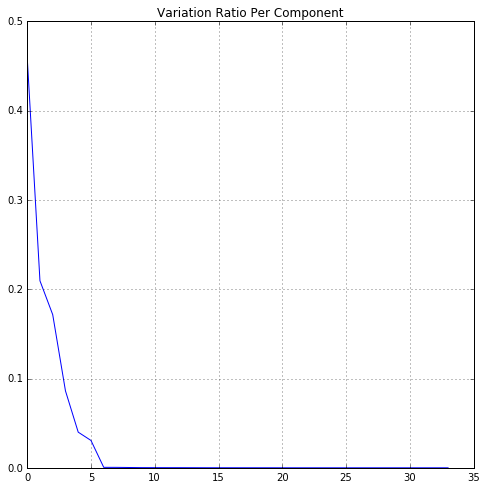

In [104]:
plt.figure(figsize=(8,8))
plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.title('Variation Ratio Per Component')






















It can be seen that 6 components should be able to sufficiently represent our data...

In [105]:
pca_6 = PCA(n_components=6)
pca_6.fit_transform(df)

array([[ -1.86718471e-04,   2.45826555e-04,  -1.77676967e-04,
         -1.55749025e-04,  -1.21613340e-04,  -1.02414466e-04],
       [ -1.05056105e-03,   8.91018313e-04,  -1.79403927e-03,
          1.98016266e-04,   3.64425371e-06,  -2.78316207e-05],
       [  3.45619874e-03,  -1.16543419e-03,   4.52284265e-03,
          8.26495330e-04,   1.29276807e-03,  -9.68788732e-04],
       ..., 
       [  5.80922471e-04,   5.42526947e-04,   9.21698721e-04,
         -8.20842504e-05,   1.17708624e-04,   9.91447816e-04],
       [ -8.41821709e-04,  -2.44533315e-04,  -1.50457846e-03,
          3.55657620e-04,  -6.74713670e-04,   1.71056748e-04],
       [  7.20121973e-04,   2.33672473e-03,   1.42921270e-03,
          1.71700871e-03,  -3.57351370e-03,  -6.13279796e-04]])

In [106]:
print pd.DataFrame(pca_6.components_,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])

                0         1         2         3         4         5   \
PC-1 -8.643067e-20  0.000010 -0.000001  0.000106  0.000010 -0.000001   
PC-2  1.763481e-17  0.000078 -0.000030 -0.000075  0.000079 -0.000031   
PC-3 -1.161939e-17  0.000027  0.000076 -0.000062  0.000029  0.000075   
PC-4 -1.017142e-16 -0.000077  0.000014  0.000082 -0.000076  0.000015   
PC-5  1.974816e-18  0.000056 -0.000070 -0.000165  0.000056 -0.000072   
PC-6 -3.710026e-18  0.000077 -0.000084  0.000331  0.000079 -0.000088   

                6         7         8         9     ...           24  \
PC-1  1.109071e-08  0.000051  0.000051  0.000113    ...    -0.000009   
PC-2  5.054252e-09  0.000037  0.000037 -0.000029    ...    -0.000003   
PC-3 -2.754822e-10 -0.000034 -0.000034  0.000151    ...     0.000009   
PC-4 -1.871305e-09 -0.000053 -0.000053  0.000198    ...    -0.000001   
PC-5 -9.919255e-09  0.000246  0.000246  0.000039    ...    -0.000063   
PC-6 -6.605608e-09 -0.000593 -0.000593  0.000334    ...     0.0

In [107]:
foo = pca_6.components_.shape
components = []
for i in range(6):
    max_component_percent = np.max(pca_6.components_[i])
    max_component_col_id = np.where(pca_6.components_[i] == max_component_percent)
    print("{} makes up {}% of PC{}".format(max_component_col_id,max_component_percent,i))
    components.append(max_component_col_id)


(array([32]),) makes up 0.93735351755% of PC0
(array([31]),) makes up 0.0764953111569% of PC1
(array([19]),) makes up 0.859851381655% of PC2
(array([20]),) makes up 0.179767506002% of PC3
(array([31]),) makes up 0.971975891233% of PC4
(array([33]),) makes up 0.982806973767% of PC5


In [108]:
#Map numbers back to data
data_label = ['time_stamp', 'id', 'numberOfWalls', 'hub_x','hub_y','hub_yaw','ball_x','ball_y','ball_z', 'rd1','rd2','rd3',
             'LVWx','LVWy','LVWz','LAWx','LAWy','LAWz','RVWx', 'RVWy', 'RVWz', 'RAWx', 'RAWy', 'RAWz', 'LVRx', 'LVRy', 'LVRz',
             'LARx', 'LARy', 'LARz','RVRx', 'RVRy', 'RVRz', 'RARx', 'RARy', 'RARz', 'resetcounter', 'checkcorrect', '#Walls']
data_labels = ['Time','ID','Mount_X','Mount_Y','Mount_Yaw','Pos_x','Pos_y','Pos_z','Yaw','Pitch','Roll','Linear_Velocity_X_World','Linear_Velocity_Y_World','Linear_Velocity_Z_World','Linear_Acceleration_X_World','Linear_Acceleration_Y_World','Linear_Acceleration_Z_World','Rotational_Velocity_X_World','Rotational_Velocity_Y_World','Rotational_Velocity_Z_World','Rotational_Acceleration_X_World','Rotational_Acceleration_Y_World','Rotational_Acceleration_Z_World','Linear_Velocity_X_Relative','Linear_Velocity_Y_Relative','Linear_Velocity_Z_Relative','Linear_Acceleration_X_Relative','Linear_Acceleration_Y_Relative','Linear_Acceleration_Z_Relative_Relative','Rotational_Velocity_X_Relative','Rotational_Velocity_Y_Relative','Rotational_Velocity_Z_Relative','Rotational_Acceleration_X_Relative','Rotational_Acceleration_Y_Relatve','Rotational_Acceleration_Z_Relative','ResetID','checkCorrectness' ]
print(len(data_labels))

37


In [109]:
del data_labels[36]
del data_labels[1]
del data_labels[0]

In [110]:
import re
for count, component in enumerate(components):
    col = re.findall(r'\d+', str(component))
    print("PC{} is mostly made up from {}".format(count,data_labels[int(col[0])]))

PC0 is mostly made up from Rotational_Acceleration_Z_Relative
PC1 is mostly made up from Rotational_Acceleration_Y_Relatve
PC2 is mostly made up from Rotational_Acceleration_Y_World
PC3 is mostly made up from Rotational_Acceleration_Z_World
PC4 is mostly made up from Rotational_Acceleration_Y_Relatve
PC5 is mostly made up from ResetID
